In [545]:
from azureml import Workspace

ws = Workspace()
dstr = ws.datasets['train.csv']
dste = ws.datasets['test.csv']
train_df = dstr.to_dataframe()
test_df = dste.to_dataframe()

In [546]:
#dstr,dste
train_df #,test_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [547]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [548]:
#train_df = pd.read_csv('../input/train.csv')
#test_df = pd.read_csv('../input/test.csv')
combine = [train_df, test_df]

In [549]:
print(train_df.columns.values)

[u'PassengerId' u'Survived' u'Pclass' u'Name' u'Sex' u'Age' u'SibSp'
 u'Parch' u'Ticket' u'Fare' u'Cabin' u'Embarked']


In [550]:
# preview the data
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [551]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [552]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [553]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [554]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [555]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [556]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [557]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [558]:
train_df[['Embarked', 'Pclass', 'Sex', 'Survived']].groupby(['Embarked','Pclass', 'Sex'], as_index=False).count().sort_values(by=['Embarked','Pclass','Sex'], ascending=True)

,Embarked,Pclass,Sex,Survived
0,C,1,female,43
1,C,1,male,42
2,C,2,female,7
3,C,2,male,10
4,C,3,female,23
5,C,3,male,43
6,Q,1,female,1
7,Q,1,male,1
8,Q,2,female,2
9,Q,2,male,1


In [559]:
train_df[['Embarked', 'Pclass', 'Sex', 'Survived']].groupby(['Embarked','Pclass', 'Sex'], as_index=False).mean().sort_values(by=['Embarked', 'Pclass', 'Sex'], ascending=True)

,Embarked,Pclass,Sex,Survived
0,C,1,female,0.976744
1,C,1,male,0.404762
2,C,2,female,1.000000
3,C,2,male,0.200000
4,C,3,female,0.652174
5,C,3,male,0.232558
6,Q,1,female,1.000000
7,Q,1,male,0.000000
8,Q,2,female,1.000000
9,Q,2,male,0.000000


In [560]:
train_df[['Embarked', 'Pclass', 'Sex', 'Survived']].groupby(['Embarked','Pclass', 'Sex'], as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,Embarked,Pclass,Sex,Survived
2,C,2,female,1.000000
6,Q,1,female,1.000000
8,Q,2,female,1.000000
0,C,1,female,0.976744
12,S,1,female,0.958333
14,S,2,female,0.910448
10,Q,3,female,0.727273
4,C,3,female,0.652174
1,C,1,male,0.404762
16,S,3,female,0.375000


In [561]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [562]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


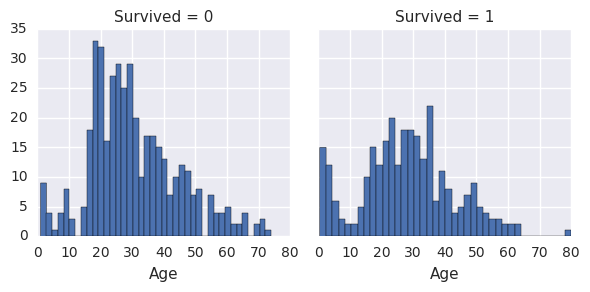

In [563]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=40)

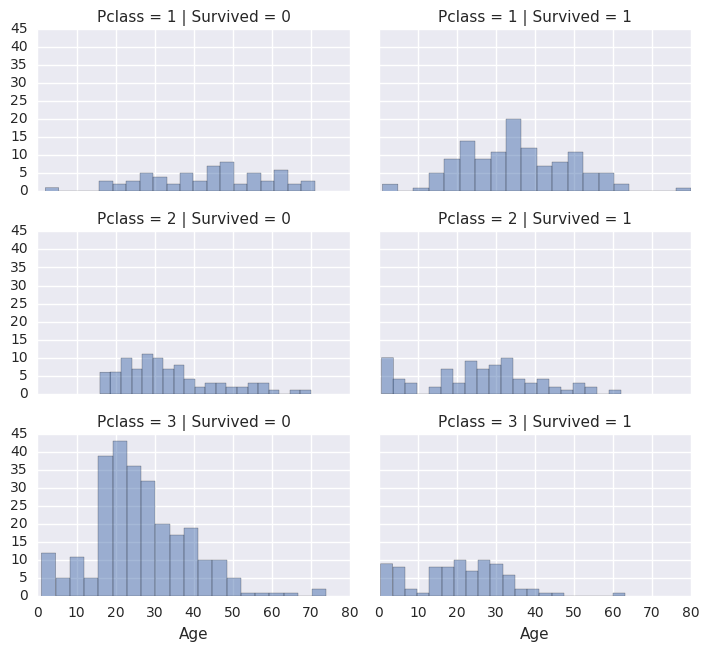

In [564]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

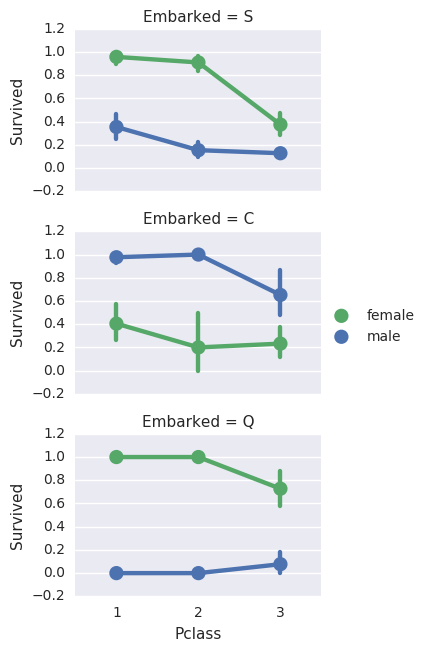

In [565]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [566]:
pd.crosstab(train_df['Embarked'], train_df['Pclass'])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


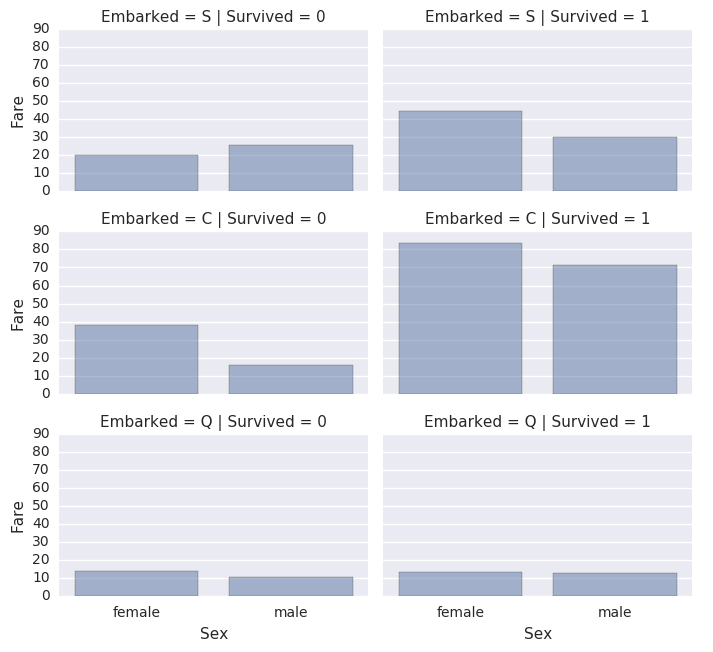

In [567]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [568]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

import string
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if string.find(big_string, substring) != -1:
            return substring
    return np.nan

cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']

for dataset in combine :
    dataset['Cabin'] = dataset['Cabin'].astype(str)
    dataset['Deck']=dataset['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

train_df = train_df.drop(['Ticket', 'Cabin',], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
#train_df
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('Before', (891, 12), (418, 11), (891, 12), (418, 11))


('After', (891, 11), (418, 10), (891, 11), (418, 10))

In [569]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [570]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Don','Major','Capt','Jonkheer','Rev','Col','Sir'], 'Mr')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Countess','Mme', 'Lady'], 'Mrs')
    dataset.loc[(dataset.Title=='Dr')&(dataset.Sex=='female'), 'Title']='Mrs'
    dataset.loc[(dataset.Title=='Dr')&(dataset.Sex=='male'), 'Title']='Mr'
        
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.160149
3,Mrs,0.798450


In [571]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,537
Mrs,129,0


In [572]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,C,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,NaN,1


In [573]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 10), (418, 10))

In [574]:
pd.crosstab(train_df['Deck'], train_df['Sex'])

Sex,female,male
Deck,,
A,1,14
B,27,20
C,27,32
D,18,15
E,16,17
F,4,8
G,4,0
T,0,1


In [575]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    dataset['Deck'] = dataset['Deck'].map( {'A': 1, 'B': 2, 'C': 3,'D': 4,'E': 5,'F': 6,'G': 7,'T': 8} )
    dataset['Deck'] = dataset['Deck'].fillna(99)
    #dataset['Deck'] = dataset['Deck'].astype(int)
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22.0,1,0,7.2500,S,99.0,1
1,1,1,1,38.0,1,0,71.2833,C,3.0,3
2,1,3,1,26.0,0,0,7.9250,S,99.0,2
3,1,1,1,35.0,1,0,53.1000,S,3.0,3
4,0,3,0,35.0,0,0,8.0500,S,99.0,1
5,0,3,0,NaN,0,0,8.4583,Q,99.0,1
6,0,1,0,54.0,0,0,51.8625,S,5.0,1
7,0,3,0,2.0,3,1,21.0750,S,99.0,4
8,1,3,1,27.0,0,2,11.1333,S,99.0,3
9,1,2,1,14.0,1,0,30.0708,C,99.0,3


In [576]:
train_df[['Deck', 'Sex', 'Survived']].groupby(['Deck', 'Sex'], as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,Deck,Sex,Survived
1,1.0,1,1.000000
3,2.0,1,1.000000
7,4.0,1,1.000000
11,6.0,1,1.000000
9,5.0,1,0.937500
5,3.0,1,0.888889
15,99.0,1,0.654378
8,5.0,0,0.588235
12,7.0,1,0.500000
6,4.0,0,0.466667


In [577]:
#train_df = train_df.drop(['Deck'], axis=1)
#test_df = test_df.drop(['Deck'], axis=1)
#combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22.0,1,0,7.2500,S,99.0,1
1,1,1,1,38.0,1,0,71.2833,C,3.0,3
2,1,3,1,26.0,0,0,7.9250,S,99.0,2
3,1,1,1,35.0,1,0,53.1000,S,3.0,3
4,0,3,0,35.0,0,0,8.0500,S,99.0,1


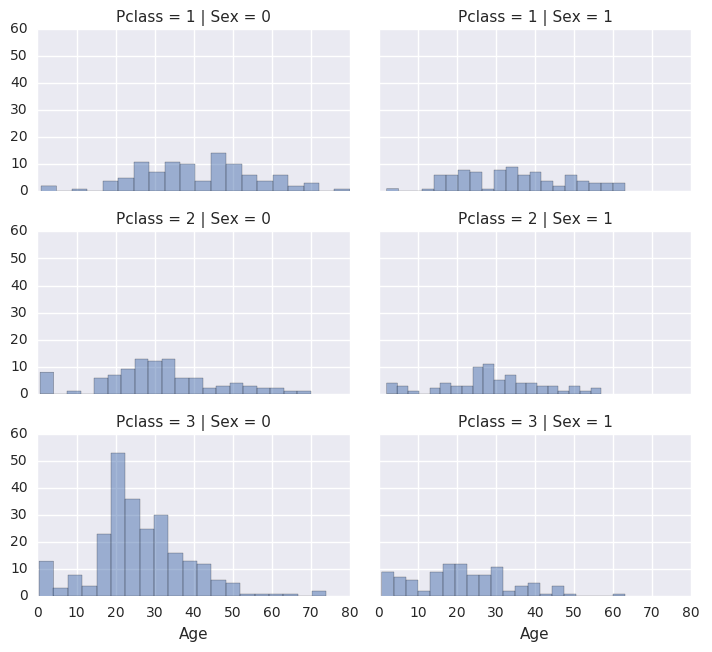

In [578]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [579]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [580]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7.2500,S,99.0,1
1,1,1,1,38,1,0,71.2833,C,3.0,3
2,1,3,1,26,0,0,7.9250,S,99.0,2
3,1,1,1,35,1,0,53.1000,S,3.0,3
4,0,3,0,35,0,0,8.0500,S,99.0,1


In [581]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 16)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 5]",0.704545
1,"(5, 10]",0.350000
2,"(10, 15]",0.578947
3,"(15, 20]",0.340206
4,"(20, 25]",0.295720
5,"(25, 30]",0.380165
6,"(30, 35]",0.526316
7,"(35, 40]",0.366667
8,"(40, 45]",0.361702
9,"(45, 50]",0.432432


In [582]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 5, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 5) & (dataset['Age'] <= 10), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 15), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 20), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 25), 'Age'] = 4    
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 35), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 45), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 60), 'Age'] = 8
    dataset.loc[ dataset['Age'] > 60, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,AgeBand
0,0,3,0,4,1,0,7.2500,S,99.0,1,"(20, 25]"
1,1,1,1,7,1,0,71.2833,C,3.0,3,"(35, 40]"
2,1,3,1,5,0,0,7.9250,S,99.0,2,"(25, 30]"
3,1,1,1,6,1,0,53.1000,S,3.0,3,"(30, 35]"
4,0,3,0,6,0,0,8.0500,S,99.0,1,"(30, 35]"


In [583]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,4,1,0,7.2500,S,99.0,1
1,1,1,1,7,1,0,71.2833,C,3.0,3
2,1,3,1,5,0,0,7.9250,S,99.0,2
3,1,1,1,6,1,0,53.1000,S,3.0,3
4,0,3,0,6,0,0,8.0500,S,99.0,1


In [584]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [585]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [586]:
train_df = train_df.drop(['Parch', 'SibSp', 'IsAlone'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'IsAlone'], axis=1)
combine = [train_df, test_df]

train_df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,FamilySize
0,0,3,0,4,7.2500,S,99.0,1,2
1,1,1,1,7,71.2833,C,3.0,3,2
2,1,3,1,5,7.9250,S,99.0,2,1
3,1,1,1,6,53.1000,S,3.0,3,2
4,0,3,0,6,8.0500,S,99.0,1,1


In [587]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,12,4,3
1,7,7,1
2,15,5,3
3,6,6,1
4,18,6,3
5,12,4,3
6,8,8,1
7,0,0,3
8,15,5,3
9,4,2,2


In [588]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

u'S'

In [589]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [590]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,FamilySize,Age*Class
0,0,3,0,4,7.2500,0,99.0,1,2,12
1,1,1,1,7,71.2833,1,3.0,3,2,7
2,1,3,1,5,7.9250,0,99.0,2,1,15
3,1,1,1,6,53.1000,0,3.0,3,2,6
4,0,3,0,6,8.0500,0,99.0,1,1,18


In [591]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Deck,Title,FamilySize,Age*Class
0,892,3,0,6,7.8292,2,99.0,1,1,18
1,893,3,1,8,7.0000,0,99.0,3,2,24
2,894,2,0,62,9.6875,2,99.0,1,1,124
3,895,3,0,5,8.6625,0,99.0,1,1,15
4,896,3,1,4,12.2875,0,99.0,3,3,12


In [592]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


In [593]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)


,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,FamilySize,Age*Class
0,0,3,0,4,0,0,99.0,1,2,12
1,1,1,1,7,3,1,3.0,3,2,7
2,1,3,1,5,1,0,99.0,2,1,15
3,1,1,1,6,3,0,3.0,3,2,6
4,0,3,0,6,1,0,99.0,1,1,18
5,0,3,0,4,1,2,99.0,1,1,12
6,0,1,0,8,3,0,5.0,1,1,8
7,0,3,0,0,2,0,99.0,4,5,0
8,1,3,1,5,1,0,99.0,3,3,15
9,1,2,1,2,2,1,99.0,3,2,4


In [594]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Deck,Title,FamilySize,Age*Class
0,892,3,0,6,0,2,99.0,1,1,18
1,893,3,1,8,0,0,99.0,3,2,24
2,894,2,0,62,1,2,99.0,1,1,124
3,895,3,0,5,1,0,99.0,1,1,15
4,896,3,1,4,1,0,99.0,3,3,12
5,897,3,0,2,1,0,99.0,1,1,6
6,898,3,1,5,0,2,99.0,2,1,15
7,899,2,0,5,2,0,99.0,1,3,10
8,900,3,1,3,0,1,99.0,3,1,9
9,901,3,0,4,2,0,99.0,1,3,12


In [595]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [596]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.27

In [597]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.665930
6,Title,1.111723
4,Embarked,0.261809
3,Fare,0.183515
8,Age*Class,0.004514
5,Deck,-0.007380
2,Age,-0.031846
7,FamilySize,-0.453808
0,Pclass,-0.707960


In [598]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

86.98

In [599]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

88.1

In [600]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.79

In [601]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

69.7

In [602]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

82.83

In [603]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

69.7

In [604]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

93.04

In [605]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

93.04

In [606]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,93.04
8,Decision Tree,93.04
1,KNN,88.10
0,Support Vector Machines,86.98
7,Linear SVC,82.83
2,Logistic Regression,82.27
4,Naive Bayes,78.79
5,Perceptron,69.70
6,Stochastic Gradient Decent,69.70


In [609]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)